<a href="https://colab.research.google.com/github/Pranavi2606/EDA_02/blob/main/EDA_M5_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21BDS0002 PRANAVI T

#Hierarchial Clustering

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [ ]:
# Load the dataset
data = pd.read_csv("/content/Crime.csv")

In [ ]:
# View basic information about the dataset and check for missing values
print("Dataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nNumber of missing values:", data.isna().sum().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  630 non-null    int64  
 1   county    630 non-null    int64  
 2   year      630 non-null    int64  
 3   crmrte    630 non-null    float64
 4   prbarr    630 non-null    float64
 5   prbconv   630 non-null    float64
 6   prbpris   630 non-null    float64
 7   avgsen    630 non-null    float64
 8   polpc     630 non-null    float64
 9   density   630 non-null    float64
 10  taxpc     630 non-null    float64
 11  region    630 non-null    object 
 12  smsa      630 non-null    object 
 13  pctmin    630 non-null    float64
 14  wcon      630 non-null    float64
 15  wtuc      630 non-null    float64
 16  wtrd      630 non-null    float64
 17  wfir      630 non-null    float64
 18  wser      630 non-null    float64
 19  wmfg      630 non-null    float64
 20  wfed      6

In [ ]:
# Data Preprocessing and Cleaning (Removing NA values if any)
data_cleaned = data.dropna()
print("\nSummary Statistics after Cleaning:")
print(data_cleaned.describe())

# Select columns for clustering analysis
selected_columns = ["crmrte", "prbarr", "prbconv", "prbpris", "avgsen", "polpc", "density"]  # Example
dataset = data_cleaned[selected_columns]
print("\nDataset with Selected Columns:")
print(dataset.head())


Summary Statistics after Cleaning:
         rownames     county        year      crmrte      prbarr     prbconv  \
count  630.000000  630.00000  630.000000  630.000000  630.000000  630.000000   
mean   315.500000  100.60000   84.000000    0.031588    0.307368    0.688618   
std    182.009615   58.03627    2.001589    0.018121    0.171205    1.690345   
min      1.000000    1.00000   81.000000    0.001812    0.058824    0.068376   
25%    158.250000   51.00000   82.000000    0.018352    0.217902    0.347692   
50%    315.500000  103.00000   84.000000    0.028441    0.278240    0.474375   
75%    472.750000  151.00000   86.000000    0.038406    0.352518    0.635597   
max    630.000000  197.00000   87.000000    0.163835    2.750000   37.000000   

          prbpris      avgsen       polpc     density  ...       lwfir  \
count  630.000000  630.000000  630.000000  630.000000  ...  630.000000   
mean     0.425518    8.954540    0.001917    1.386062  ...    5.579433   
std      0.087245    

In [ ]:
def compute_dendrogram(data, distance_method, hclust_method="ward"):
    distance_matrix = pdist(data, metric=distance_method)
    print(f"\nDistance Matrix (Method: {distance_method}):")
    matrix_preview = np.round(distance_matrix[:10], decimals=3)
    print("Distance Matrix Preview (First 10 Elements):")
    print(matrix_preview)

    # Hierarchical Clustering using linkage
    linkage_matrix = linkage(distance_matrix, method=hclust_method)

    # Plot the dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix)
    plt.title(f"Dendrogram using {distance_method} distance (21BDS0002)")
    plt.xlabel("Observations")
    plt.ylabel("Height")
    plt.show()


Distance Matrix (Method: euclidean):
Distance Matrix Preview (First 10 Elements):
[0.074 0.233 1.299 0.959 1.298 1.114 3.172 1.379 3.404 2.77 ]


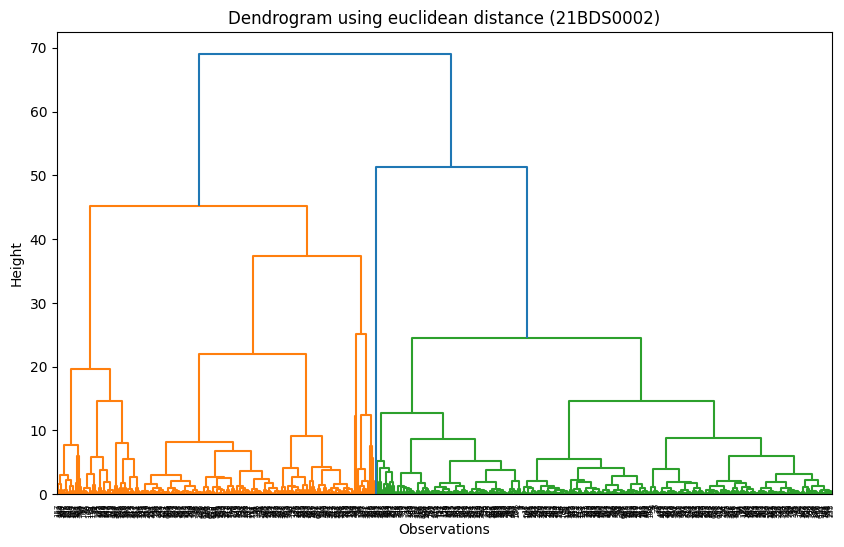

In [ ]:
# Euclidean Distance
compute_dendrogram(dataset, "euclidean")


Distance Matrix (Method: cityblock):
Distance Matrix Preview (First 10 Elements):
[0.159 0.406 1.648 1.238 1.553 1.39  4.755 2.03  5.177 4.325]


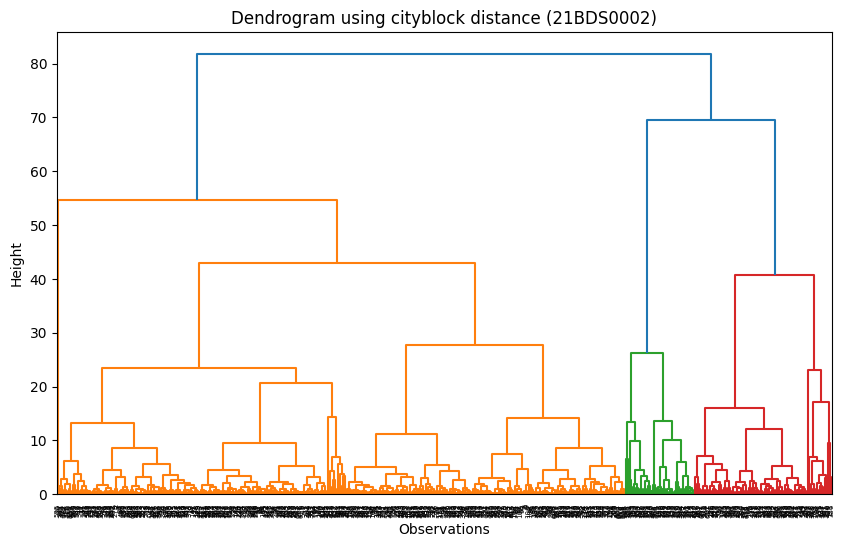

In [ ]:
# Manhattan Distance
compute_dendrogram(dataset, "cityblock")


Distance Matrix (Method: chebyshev):
Distance Matrix Preview (First 10 Elements):
[0.048 0.19  1.28  0.94  1.29  1.1   2.84  1.315 3.08  2.4  ]


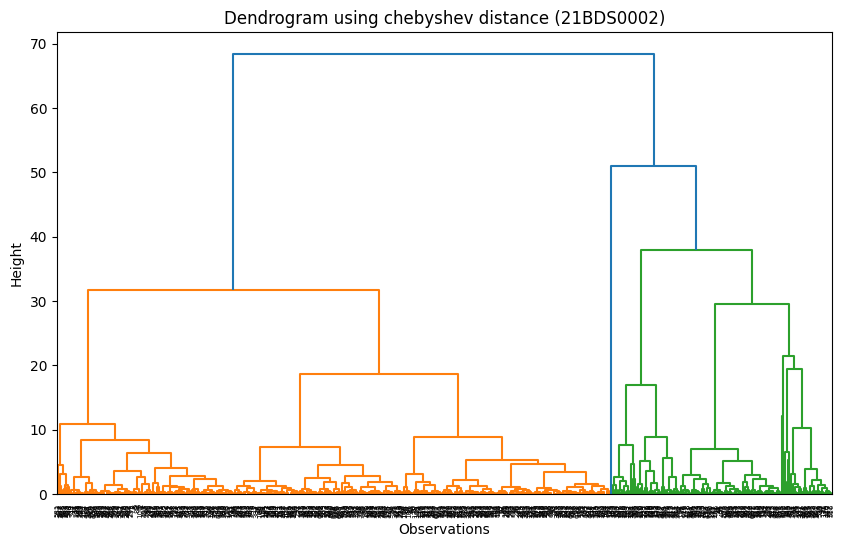

In [ ]:
# Maximum Distance
compute_dendrogram(dataset, "chebyshev")


Distance Matrix (Method: canberra):
Distance Matrix Preview (First 10 Elements):
[0.182 0.381 0.568 0.434 0.433 0.371 2.076 1.904 2.224 2.146]


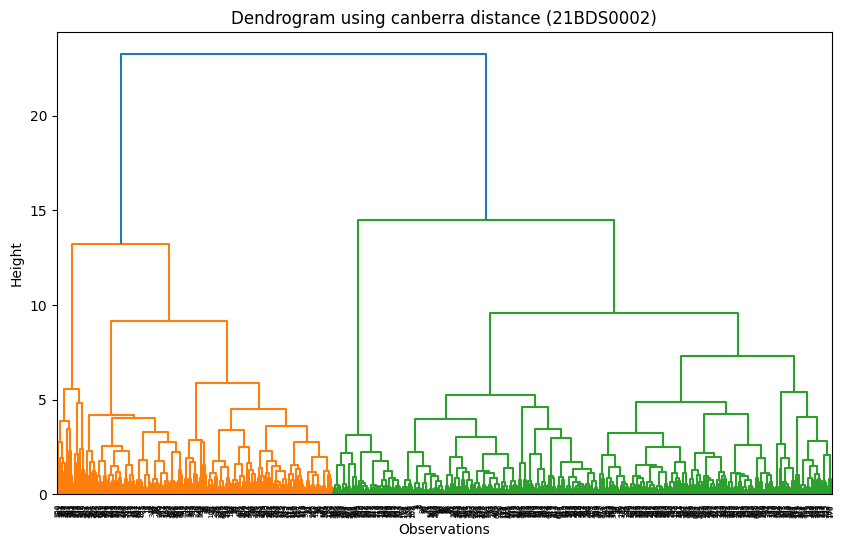

In [ ]:
# Canberra Distance
compute_dendrogram(dataset, "canberra")


Distance Matrix (Method: minkowski):
Distance Matrix Preview (First 10 Elements):
[0.074 0.233 1.299 0.959 1.298 1.114 3.172 1.379 3.404 2.77 ]


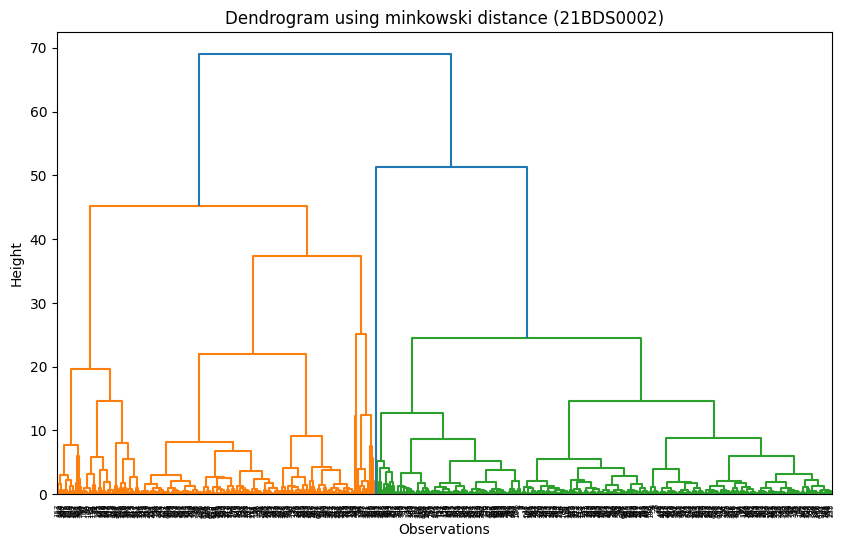

In [ ]:
# Minkowski Distance (with default p=2, can be changed using p argument in pdist)
compute_dendrogram(dataset, "minkowski")

#K-Means Clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# Load the Crime dataset
crime_data = pd.read_csv('/content/Crime.csv')

In [ ]:
# Extracting columns for clustering (change columns if needed)
crime_features = crime_data[['crmrte', 'density']]

# Standardize the features
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime_features)

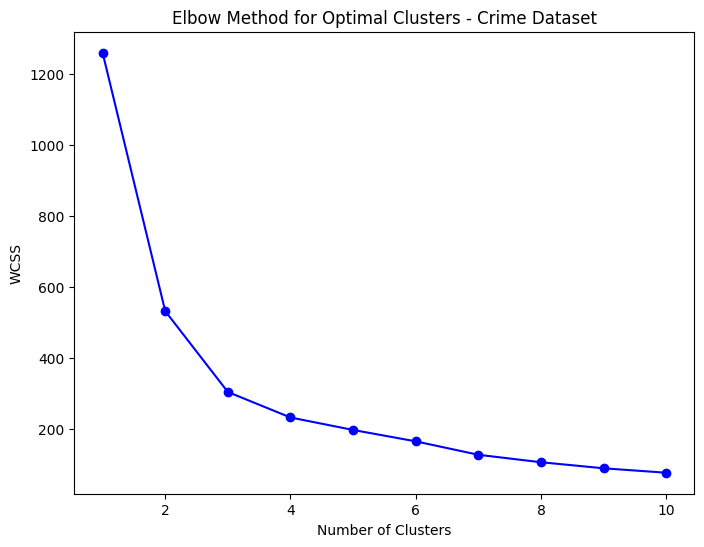

In [ ]:
# Elbow Method for Crime dataset
def elbow_method_crime(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
    plt.title('Elbow Method for Optimal Clusters - Crime Dataset')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

# Perform the elbow method on the Crime dataset
elbow_method_crime(crime_scaled)


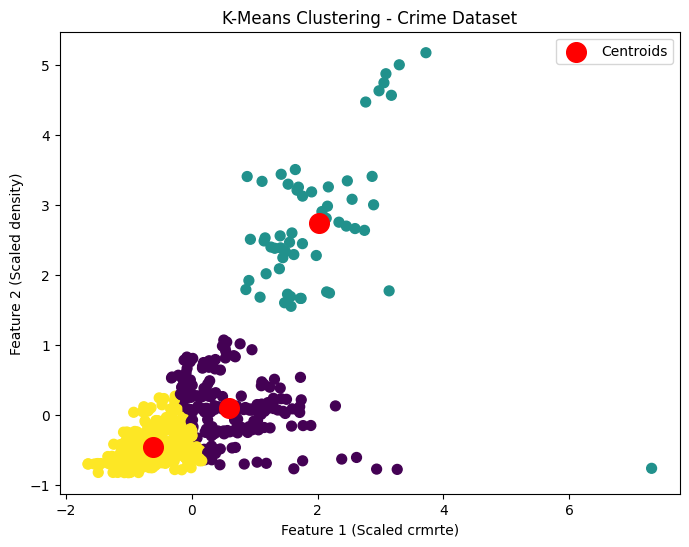

Silhouette Score for Crime Dataset: 0.4987219008995732


In [ ]:
# Choose an optimal number of clusters based on elbow method, e.g., 3
crime_clusters = 3

# K-Means Clustering and Visualization for Crime dataset
def plot_kmeans_clusters_crime(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(data)

    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
    plt.title('K-Means Clustering - Crime Dataset')
    plt.xlabel('Feature 1 (Scaled crmrte)')
    plt.ylabel('Feature 2 (Scaled density)')
    plt.legend()
    plt.show()

    # Print silhouette score
    silhouette_avg = silhouette_score(data, labels)
    print(f'Silhouette Score for Crime Dataset: {silhouette_avg}')

# Plotting K-Means clusters for Crime dataset
plot_kmeans_clusters_crime(crime_scaled, crime_clusters)
